<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/AmazonRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **•	Section A: Data Understanding & Cleaning**

# **o	Summarize the dataset:**
# **	Number of unique users, products, and reviews**




In [1]:
import pandas as pd

df = pd.read_csv("/content/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
unique_users = df['user_id'].nunique()
print(unique_users)


1194


In [3]:
unique_products = df['product_id'].nunique()
print(unique_products)


1351


In [4]:
unique_review = df['review_id'].nunique()
print(unique_review)


1194


# **	Top 5 categories by number of products**

In [5]:
df['root_category'] = df['category'].str.split('|').str[0]

# Count unique products per root category
top_root_categories = df.groupby('root_category')['product_id'].nunique().sort_values(ascending=False).head(5)

print("Top 5 root-level categories by number of products:")
print(top_root_categories)


Top 5 root-level categories by number of products:
root_category
Electronics              490
Home&Kitchen             448
Computers&Accessories    375
OfficeProducts            31
MusicalInstruments         2
Name: product_id, dtype: int64


# **	Price range and discount insights**

In [6]:
df.replace(',','', regex=True, inplace=True)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,root_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,₹1099,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,ManavAdarsh guptaSundeepS.Sayeed Ahmedjaspreet...,R3HXWT0LRP0NMFR2AJM3LFTLZHFOR6AQJGUP6P86R1KD19...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,ArdKnNirbhay kumarSagar ViswanathanAspPlacehol...,RGIQEG07R9HS2R1SMWZQ86XIN8UR2J3Y1WL29GWDERYGGS...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹1899,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,KunalHimanshuviswanathsai niharkasaqib malikAa...,R3J3EQQ9TZI5ZJR3E7WBGK7ID0KVRWU79XKQ6I1QFR25X4...,Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttps://m.media-am...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,Omkar dhaleJDHEMALATHAAjwadh a.amar singh chou...,R3EEUZKKK9J36IR3HJVYCLYOY554REDECAZ7AMPQCR1CLH...,Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,rahuls6099Swasat BorahAjay WadkePranaliRVKBhar...,R1BP4L2HH9TFUPR16PVJEXKV6QZSR2UPDB81N66T4PR3KK...,As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


In [7]:
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,root_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,1099,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,ManavAdarsh guptaSundeepS.Sayeed Ahmedjaspreet...,R3HXWT0LRP0NMFR2AJM3LFTLZHFOR6AQJGUP6P86R1KD19...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,349,43%,4,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,ArdKnNirbhay kumarSagar ViswanathanAspPlacehol...,RGIQEG07R9HS2R1SMWZQ86XIN8UR2J3Y1WL29GWDERYGGS...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,1899,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,KunalHimanshuviswanathsai niharkasaqib malikAa...,R3J3EQQ9TZI5ZJR3E7WBGK7ID0KVRWU79XKQ6I1QFR25X4...,Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttps://m.media-am...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,699,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,Omkar dhaleJDHEMALATHAAjwadh a.amar singh chou...,R3EEUZKKK9J36IR3HJVYCLYOY554REDECAZ7AMPQCR1CLH...,Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,399,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,rahuls6099Swasat BorahAjay WadkePranaliRVKBhar...,R1BP4L2HH9TFUPR16PVJEXKV6QZSR2UPDB81N66T4PR3KK...,As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


In [8]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,root_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,ManavAdarsh guptaSundeepS.Sayeed Ahmedjaspreet...,R3HXWT0LRP0NMFR2AJM3LFTLZHFOR6AQJGUP6P86R1KD19...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,ArdKnNirbhay kumarSagar ViswanathanAspPlacehol...,RGIQEG07R9HS2R1SMWZQ86XIN8UR2J3Y1WL29GWDERYGGS...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,KunalHimanshuviswanathsai niharkasaqib malikAa...,R3J3EQQ9TZI5ZJR3E7WBGK7ID0KVRWU79XKQ6I1QFR25X4...,Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttps://m.media-am...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,Omkar dhaleJDHEMALATHAAjwadh a.amar singh chou...,R3EEUZKKK9J36IR3HJVYCLYOY554REDECAZ7AMPQCR1CLH...,Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,rahuls6099Swasat BorahAjay WadkePranaliRVKBhar...,R1BP4L2HH9TFUPR16PVJEXKV6QZSR2UPDB81N66T4PR3KK...,As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


In [9]:
print("Actual Price Stats:")
print(df['actual_price'].describe())

print("\nDiscounted Price Stats:")
print(df['discounted_price'].describe())

Actual Price Stats:
count     1465
unique     449
top        999
freq       120
Name: actual_price, dtype: object

Discounted Price Stats:
count     1465
unique     550
top        199
freq        53
Name: discounted_price, dtype: object


In [10]:
print(df[['actual_price', 'discounted_price']].dtypes)


actual_price        object
discounted_price    object
dtype: object


In [ ]:
print(df['actual_price'].isna().sum())


0


In [11]:
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


In [12]:
max_price = df['actual_price'].max()
print(f"Max actual price: ₹{max_price}")


Max actual price: ₹139900.0


In [13]:
price_bins = [0, 500, 1000, 2000, 5000, 10000, max_price+1]
price_labels = ['<₹500', '₹500–1K', '₹1K–2K', '₹2K–5K', '₹5K–10K', f'>₹{int(max_price)}']

df['price_range'] = pd.cut(df['actual_price'], bins=price_bins, labels=price_labels)
df['price_range']

,price_range
0,₹1K–2K
1,<₹500
2,₹1K–2K
3,₹500–1K
4,<₹500
...,...
1460,₹500–1K
1461,₹2K–5K
1462,₹2K–5K
1463,₹1K–2K


In [14]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['discounted_price']

,discounted_price
0,399.0
1,199.0
2,199.0
3,329.0
4,154.0
...,...
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0


In [15]:

discount_bins = [0, 500, 1000, 1500, 2000, 3000]
discount_labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-3000']
df['discount_distribution'] = pd.cut(df['discounted_price'], bins=discount_bins, labels=discount_labels)
df['discount_distribution']

,discount_distribution
0,0-500
1,0-500
2,0-500
3,0-500
4,0-500
...,...
1460,0-500
1461,2000-3000
1462,2000-3000
1463,1000-1500


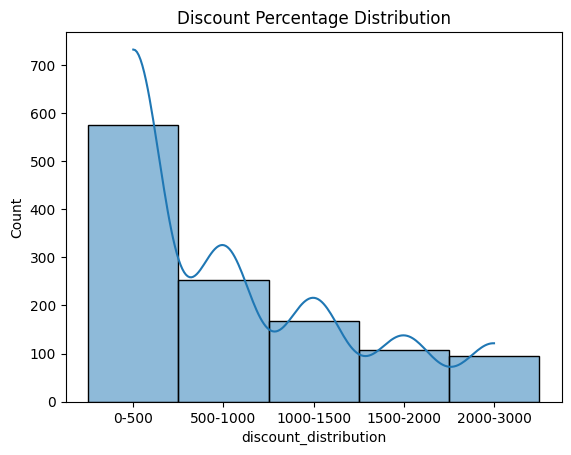

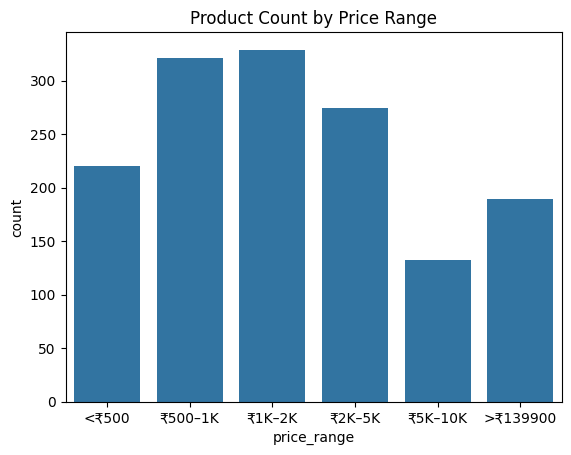

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['discount_distribution'], bins=20, kde=True)
plt.title("Discount Percentage Distribution")
plt.show()

sns.countplot(x='price_range', data=df)
plt.title("Product Count by Price Range")
plt.show()


In [17]:
category_levels = df['category'].str.split('|', expand=True)

category_levels.columns = [f'level_{i+1}' for i in range(category_levels.shape[1])]

df = pd.concat([df, category_levels], axis=1)

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.head()

/tmp/ipython-input-2153946996.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,root_category,price_range,discount_distribution,level_1,level_2,level_3,level_4,level_5,level_6,level_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,Computers&Accessories,₹1K–2K,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,Computers&Accessories,<₹500,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,Computers&Accessories,₹1K–2K,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,Computers&Accessories,₹500–1K,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,Computers&Accessories,<₹500,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [18]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating']
df['zscore_rating'] = (df['rating'] - df['rating'].mean()) / df['rating'].std()
df['zscore_rating']
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,price_range,discount_distribution,level_1,level_2,level_3,level_4,level_5,level_6,level_7,zscore_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,₹1K–2K,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,<₹500,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,-0.331139
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,₹1K–2K,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,-0.673988
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,₹500–1K,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,<₹500,0-500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558


In [19]:
threshold = 3
df['is_outlier'] = df['zscore_rating'].abs() > threshold

outlier_count = df['is_outlier'].sum()
outlier_count

np.int64(19)

In [20]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
df['price_difference']
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_1,level_2,level_3,level_4,level_5,level_6,level_7,zscore_rating,is_outlier,price_difference
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,-0.331139,False,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,-0.673988,False,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,245.0


In [21]:
df['value_for_money_score'] = df['rating'] / df['discounted_price']
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_2,level_3,level_4,level_5,level_6,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,700.0,0.010526
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,-0.331139,False,150.0,0.020101
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,-0.673988,False,1700.0,0.019598
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,370.0,0.012766
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,245.0,0.027273


In [22]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['rating_count']

C = df['rating'].mean()
m = df['rating_count'].quantile(0.90)

def weighted_rating(x, m=m, C=C):
    v = x['rating_count']
    R = x['rating']
    return (v / (v + m)) * R + (m / (v + m)) * C

df['weighted_rating'] = df.apply(weighted_rating, axis=1)
df['weighted_rating']
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_3,level_4,level_5,level_6,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score,weighted_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,700.0,0.010526,4.135908
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,Cables&Accessories,Cables,USBCables,None,None,-0.331139,False,150.0,0.020101,4.045727
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,Cables&Accessories,Cables,USBCables,None,None,-0.673988,False,1700.0,0.019598,4.063762
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,370.0,0.012766,4.169455
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,245.0,0.027273,4.127549


# **Handle missing values or anomalies**
# **Remove duplicates, invalid records**
# **Handle missing ratings/reviews with appropriate strategy**


In [23]:
# Remove exact duplicate rows
df = df.drop_duplicates()

df = df.dropna(subset=['product_id', 'product_name'])

df = df[(df['actual_price'] > 0) & (df['discounted_price'] > 0)]
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_3,level_4,level_5,level_6,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score,weighted_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,700.0,0.010526,4.135908
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,Cables&Accessories,Cables,USBCables,None,None,-0.331139,False,150.0,0.020101,4.045727
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,Cables&Accessories,Cables,USBCables,None,None,-0.673988,False,1700.0,0.019598,4.063762
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,370.0,0.012766,4.169455
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,245.0,0.027273,4.127549


In [24]:
df['rating'] = df['rating'].fillna(df['rating'].median())

df['rating_count'] = df['rating_count'].fillna(0)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_3,level_4,level_5,level_6,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score,weighted_rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,700.0,0.010526,4.135908
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,Cables&Accessories,Cables,USBCables,None,None,-0.331139,False,150.0,0.020101,4.045727
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,Cables&Accessories,Cables,USBCables,None,None,-0.673988,False,1700.0,0.019598,4.063762
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,370.0,0.012766,4.169455
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,Cables&Accessories,Cables,USBCables,None,None,0.354558,False,245.0,0.027273,4.127549


In [25]:
df['missing_rating'] = df['rating'].isna().astype(int)
df['missing_reviews'] = df['rating_count'].isna().astype(int)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_5,level_6,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score,weighted_rating,missing_rating,missing_reviews
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,USBCables,None,None,0.354558,False,700.0,0.010526,4.135908,0,0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,USBCables,None,None,-0.331139,False,150.0,0.020101,4.045727,0,0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,USBCables,None,None,-0.673988,False,1700.0,0.019598,4.063762,0,0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,USBCables,None,None,0.354558,False,370.0,0.012766,4.169455,0,0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,USBCables,None,None,0.354558,False,245.0,0.027273,4.127549,0,0


# **Section B: Exploratory Data Analysis: Think like a product analyst trying to identify buying patterns**

# **Visualize:**
	Most reviewed products Visualize top 10 categories by number of products.
	Average rating per category
	Discounts vs actual price correlation
	User Engagement Insights (5 marks)
○ Which products have high ratings but low review counts?
○ Are highly rated products also heavily reviewed?


# **Create 3 actionable insights for Amazon’s product strategy based on EDA.**


/tmp/ipython-input-1291399466.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


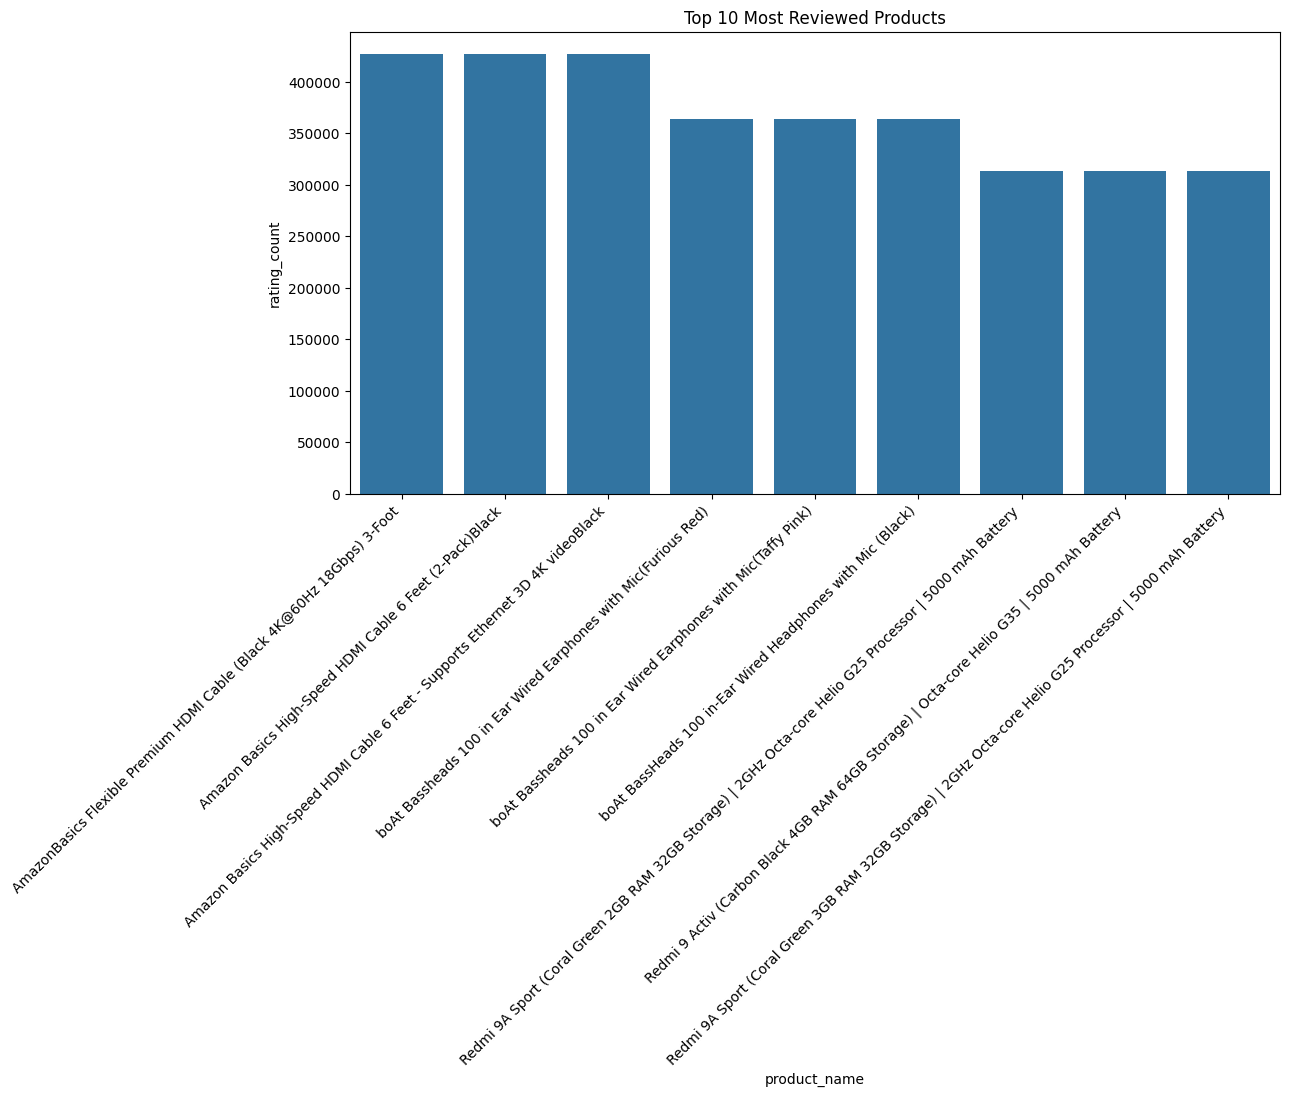

In [26]:
top_reviewed = df.sort_values(by='rating_count', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='product_name', y='rating_count', data=top_reviewed)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Reviewed Products')
plt.tight_layout()
plt.show()


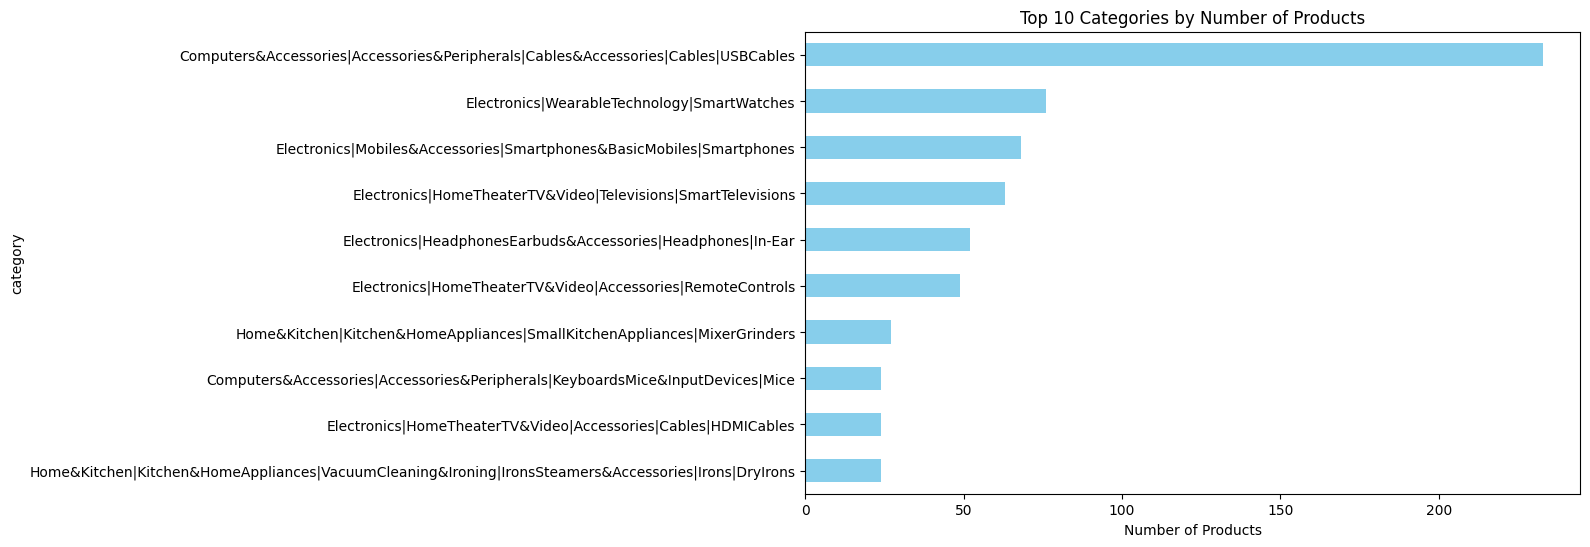

In [27]:
top_categories = df['category'].value_counts().head(10)

top_categories.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Top 10 Categories by Number of Products')
plt.xlabel('Number of Products')
plt.gca().invert_yaxis()
plt.show()


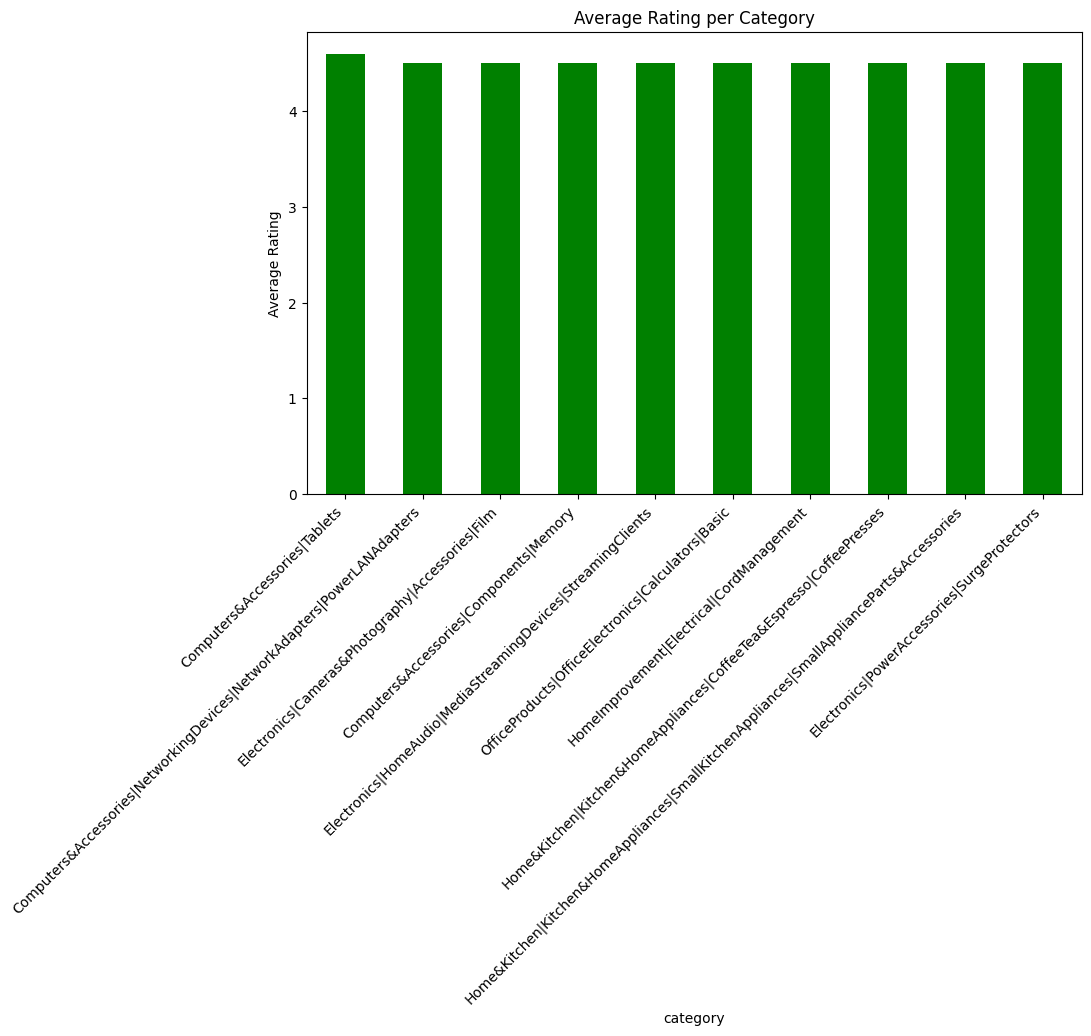

In [28]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

avg_rating.plot(kind='bar', figsize=(10,6), color='green')
plt.title('Average Rating per Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


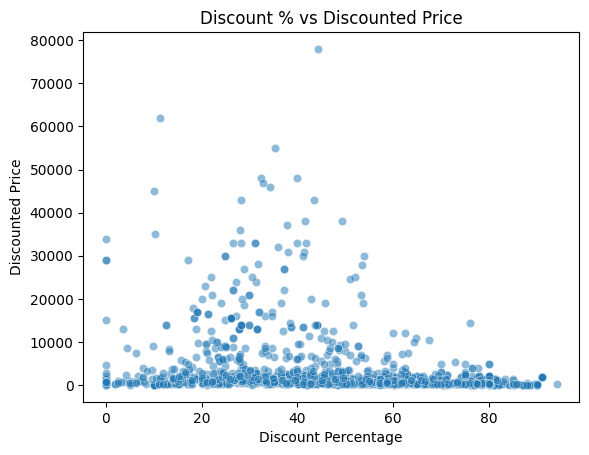

Correlation between discount % and discounted price: -0.24


In [29]:
df['discount_percent'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

sns.scatterplot(x='discount_percent', y='discounted_price', data=df, alpha=0.5)
plt.title('Discount % vs Discounted Price')
plt.xlabel('Discount Percentage')
plt.ylabel('Discounted Price')
plt.show()

# Correlation coefficient
correlation = df['discount_percent'].corr(df['discounted_price'])
print(f"Correlation between discount % and discounted price: {correlation:.2f}")



In [30]:
high_rating_low_reviews = df[(df['rating'] >= 4.5) & (df['rating_count'] < 10)]
high_rating_low_reviews

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_6,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score,weighted_rating,missing_rating,missing_reviews,discount_percent
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,399.0,1999.0,80%,5.0,5.0,This sturdy and durable cable made of tpe and ...,AF7EOXYL5K36BDP6PXF6K2TL5TPAAEN7NV2P5WNHM7EXCW...,...,None,None,3.097345,True,1600.0,0.012531,4.096699,0,0,80.040020
299,B0BNDD9TN6,WANBO X1 Pro (Upgraded) | Native 1080P Full HD...,Electronics|HomeTheaterTV&Video|Projectors,13990.0,28900.0,52%,4.5,7.0,✔️ Powerfully Compact: Wanbo X1 pro boasts inc...,AGJUSTWREQRCTY3KJHDL6I2MZDTAAEHIS3XIFCPQPLDPWV...,...,None,None,1.383103,False,14910.0,0.000322,4.096656,0,0,51.591696
324,B0BQRJ3C47,REDTECH USB-C to Lightning Cable 3.3FT [Apple ...,Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75%,5.0,0.0,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,...,None,None,3.097345,True,750.0,0.020080,NaN,0,0,75.075075
1293,B09P1MFKG1,Melbon VM-905 2000-Watt Room Heater (ISI Certi...,Home&Kitchen|HeatingCooling&AirQuality|RoomHea...,998.0,2999.0,67%,4.6,9.0,Lightweight (1.2 kg) for easy portability betw...,AENGRDSABHKCYNYJPZ2SML6FWVHAAFNGD6S7UIHBQ2FNXU...,...,None,None,1.725951,False,2001.0,0.004609,4.096699,0,0,66.722241


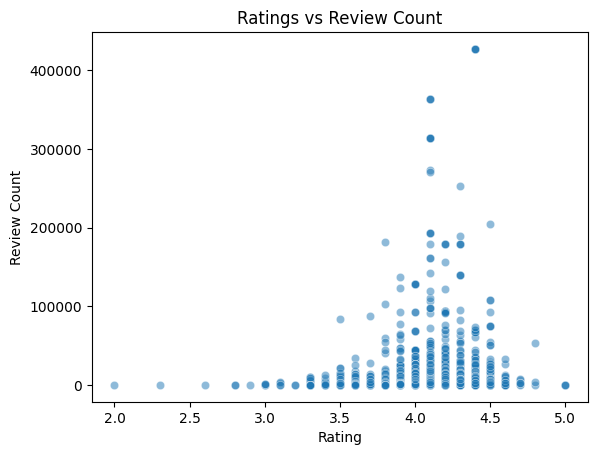

Correlation between rating and rating count: 0.10


In [31]:
sns.scatterplot(x='rating', y='rating_count', data=df, alpha=0.5)
plt.title('Ratings vs Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

# Correlation
rating_review_corr = df['rating'].corr(df['rating_count'])
print(f"Correlation between rating and rating count: {rating_review_corr:.2f}")


# **Insight 1:**
High-Rated, Low-Visibility Products
Many products show good ratings (e.g., 4.5+) but have very few reviews. these are mostly new launches or niche items with high satisfaction but low reach.

# **Insight 2:**
Discount strategy , for high price product discount is low for mid range product discount is decent

# **Insight 3:**
Few of the categories are performing well compared to few others ex: electronic accessories

# **Section C: Content-Based Filtering: Act like a content engineer personalizing user feeds based on product metadata.**
o	Vectorize product text (about_product + product_name) using:
	TF-IDF or embeddings
	Build a product similarity matrix
o	Recommend top 5 similar products to:
	A new product with no reviews
	A product with high user dropout (bad ratings)
o	Add category, price, and discount to enhance content vectors
o	Evaluate recommendations:
	How diverse and relevant are the content-based results?


In [32]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from sklearn.decomposition import TruncatedSVD
import re
import nltk

from nltk.corpus import stopwords

# ---------- 2) Basic text cleaning ----------
stop_words = set(stopwords.words('english'))
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    tokens = [t for t in s.split() if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

df['text'] = (df['product_name'].fillna('') + ' ' + df['about_product'].fillna('')).map(clean_text)

df['text']

,text
0,wayona nylon braided usb lightning fast chargi...
1,ambrane unbreakable 60w 3a fast charging 5m br...
2,sounce fast phone charging cable data sync usb...
3,boat deuce usb 300 type micro usb stress resis...
4,portronics konnect 2m fast charging 3a pin usb...
...,...
1460,noir aqua 5pcs pp spun filter spanner types ro...
1461,prestige delight prwo electric rice cooker whi...
1462,bajaj majesty rx10 2000 watts heat convector r...
1463,havells ventil air dsp 230mm exhaust fan pista...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(df['text'])   # shape: (n_products, n_tfidf_features)


In [35]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,level_7,zscore_rating,is_outlier,price_difference,value_for_money_score,weighted_rating,missing_rating,missing_reviews,discount_percent,text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,None,0.354558,False,700.0,0.010526,4.135908,0,0,63.694268,wayona nylon braided usb lightning fast chargi...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,None,-0.331139,False,150.0,0.020101,4.045727,0,0,42.979943,ambrane unbreakable 60w 3a fast charging 5m br...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,None,-0.673988,False,1700.0,0.019598,4.063762,0,0,89.520800,sounce fast phone charging cable data sync usb...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,None,0.354558,False,370.0,0.012766,4.169455,0,0,52.932761,boat deuce usb 300 type micro usb stress resis...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,None,0.354558,False,245.0,0.027273,4.127549,0,0,61.403509,portronics konnect 2m fast charging 3a pin usb...


In [36]:
svd = TruncatedSVD(n_components=200, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

In [37]:
from sklearn.preprocessing import MinMaxScaler
def top_category(cat):
    if pd.isna(cat):
        return "unknown"
    return str(cat).split('>')[0].strip()

df['top_cat'] = df['category'].fillna('unknown').map(top_category)

# One-hot (or use target encoding if many categories)
cat_dummies = pd.get_dummies(df['top_cat'], prefix='cat', dtype=float)

# Price and discount numeric features
# convert price strings to numeric if needed
def to_float(x):
    try:
        return float(str(x).replace('$','').replace(',','').strip())
    except:
        return np.nan

df['price_num'] = df['actual_price'].apply(to_float)
df['discount_num'] = df['discounted_price'].apply(to_float)  # if discount is percent or absolute; adapt

# fill or impute missing price/discount with median
df['price_num'].fillna(df['price_num'].median(), inplace=True)
df['discount_num'].fillna(0, inplace=True)

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(df[['price_num','discount_num']])

/tmp/ipython-input-772157387.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_num'].fillna(df['price_num'].median(), inplace=True)
/tmp/ipython-input-772157387.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [38]:
import numpy as np
from scipy.sparse import hstack, csr_matrix

# If we use reduced dense TF-IDF:
text_feats = tfidf_reduced  # shape (n, n_text_feats)
meta_feats = np.hstack([num_scaled, cat_dummies.values])  # numeric + categories
# scale meta_feats to similar magnitude
meta_scaler = MinMaxScaler()
meta_feats_scaled = meta_scaler.fit_transform(meta_feats)

# final product vectors (dense)
product_vectors = np.hstack([text_feats, meta_feats_scaled])

In [39]:
product_id_col = 'product_id'  # adjust
id_to_idx = {pid: idx for idx, pid in enumerate(df[product_id_col].values)}
idx_to_id = {int(idx): pid for idx, pid in enumerate(df[product_id_col].values)}


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(product_vectors)

def recommend_similar_products(product_id, top_k=5, filter_seen_ids=None):
    """
    Return list of (product_id, score) for top_k most similar products to product_id.
    filter_seen_ids: list of product_ids to exclude (e.g., same product or previously bought)
    """
    if product_id not in id_to_idx:
        raise ValueError("product_id not in catalog")
    idx = id_to_idx[product_id]
    scores = sim_matrix[idx].copy()
    # set self to very small
    scores[idx] = -1
    # mask seen
    if filter_seen_ids:
        for pid in filter_seen_ids:
            if pid in id_to_idx:
                scores[id_to_idx[pid]] = -1
    top_idx = np.argsort(scores)[::-1][:top_k]
    return [(idx_to_id[int(i)], float(scores[i])) for i in top_idx]

In [41]:
def vectorize_new_product(name, about, category, price, discount):
    t = clean_text((name or '') + ' ' + (about or ''))
    t_vec = tfidf.transform([t])           # sparse
    t_reduced = svd.transform(t_vec)       # dense
    top_cat_val = top_category(category)
    cat_vec = np.array([1 if c==top_cat_val else 0 for c in df['top_cat'].unique()])  # or align columns better
    # careful: better to use the same category encoding columns order (below we map)
    # Build meta vector consistent with earlier columns:
    cat_col_names = cat_dummies.columns.tolist()
    cat_array = np.zeros(len(cat_col_names))
    colname = 'cat_' + top_cat_val
    if colname in cat_col_names:
        cat_array[cat_col_names.index(colname)] = 1.0
    num = scaler.transform([[price if price is not None else df['price_num'].median(), discount if discount is not None else 0]])
    meta = np.hstack([num.flatten(), cat_array])
    meta_scaled = meta_scaler.transform(meta.reshape(1,-1))
    return np.hstack([t_reduced.flatten(), meta_scaled.flatten()])

In [42]:
def recommend_for_new_product(name, about, category, price, discount, top_k=5):
    vec = vectorize_new_product(name, about, category, price, discount)
    sims = cosine_similarity(vec.reshape(1,-1), product_vectors).flatten()
    top_idx = np.argsort(sims)[::-1][:top_k]
    return [(idx_to_id[i], float(sims[i]), df.iloc[i][['product_name','top_cat','price_num']].to_dict()) for i in top_idx]

In [43]:
def recommend_replace_products(product_id, top_k=5, min_rating=4.0):
    # get similar products
    recs = recommend_similar_products(product_id, top_k=50)
    # filter by average rating if available
    out = []
    for pid, score in recs:
        r = df.loc[df[product_id_col]==pid, 'rating'].mean() if 'rating' in df.columns else np.nan
        if not np.isnan(r) and r >= min_rating:
            out.append((pid, score, r))
        if len(out) >= top_k:
            break
    # fallback: if not enough, return top similar regardless of rating
    if len(out) < top_k:
        more = recs[:top_k-len(out)]
        out.extend([(pid, score, df.loc[df[product_id_col]==pid,'rating'].mean() if 'rating' in df.columns else np.nan) for pid, score in more])
    return out

In [44]:
example_pid = df.iloc[0][product_id_col]
print("Top 5 similar to product:", example_pid)
print(recommend_similar_products(example_pid, top_k=5))

# New product example
print("\nTop 5 recommendations for a new product (example):")
print(recommend_for_new_product(name="Wireless Bluetooth Headphones", about="Noise cancelling, 30h battery", category="Electronics > Audio", price=59.99, discount=10.0, top_k=5))

# For bad-rated product
print("\nReplace/better products for a product with bad ratings:")
print(recommend_replace_products(example_pid, top_k=5, min_rating=4.0))


Top 5 similar to product: B07JW9H4J1
[('B07JW9H4J1', 1.0000000000000004), ('B07JW9H4J1', 1.0000000000000004), ('B07JH1CBGW', 0.9960546107482944), ('B07JW1Y6XV', 0.9942422594200822), ('B07JH1C41D', 0.9942344745657488)]

Top 5 recommendations for a new product (example):
[('B07W6VWZ8C', 0.3193520303927181, {'product_name': 'Infinity (JBL Fuze Pint Wireless Ultra Portable Mini Speaker with Mic Deep Bass Dual Equalizer Bluetooth 5.0 with Voice Assistant Support for Mobiles (Black)', 'top_cat': 'Electronics|HomeAudio|Speakers|OutdoorSpeakers', 'price_num': 1999.0}), ('B07B88KQZ8', 0.30111039710210064, {'product_name': 'JBL Go 2 Wireless Portable Bluetooth Speaker with Mic JBL Signature Sound Vibrant Color Options with IPX7 Waterproof & AUX (Blue)', 'top_cat': 'Electronics|HomeAudio|Speakers|BluetoothSpeakers', 'price_num': 2999.0}), ('B07W7Z6DVL', 0.30097094613130415, {'product_name': 'Infinity (JBL Fuze 100 Wireless Portable Bluetooth Speaker with Mic Deep Bass Dual Equalizer IPX7 Waterpro

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# **Section D: Collaborative Filtering (User–Item) : Now you're a machine learning engineer building smart recommendations using user behavior.**
o	Create a user-item matrix using user_id, product_id, and rating.
o	Apply: User-User Collaborative Filtering (cosine similarity) OR Item-Item Collaborative Filtering (cosine or Pearson)
o	Recommend top 5 unseen products per user



In [45]:
ratings = df[['user_id', 'product_id', 'rating']].dropna()
user_item_matrix = ratings.pivot_table(
    index='user_id',
    columns='product_id',
    values='rating',
    fill_value=0
)

user_ids = user_item_matrix.index.tolist()
product_ids = user_item_matrix.columns.tolist()

In [46]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_ids, columns=user_ids)


In [47]:
import numpy as np
def recommend_user_user(user_id, top_k=5):
    if user_id not in user_ids:
        raise ValueError("Unknown user_id")

    # similarity scores for this user
    sim_scores = user_similarity_df.loc[user_id]

    # all users' ratings
    ratings_matrix = user_item_matrix.values

    # weighted sum: sim * ratings / sum(sim)
    user_idx = user_ids.index(user_id)
    sim_vector = sim_scores.values.reshape(1, -1)
    weighted_ratings = sim_vector @ ratings_matrix
    denom = np.abs(sim_vector).sum(axis=1)
    preds = weighted_ratings / (denom + 1e-8)

    preds = preds.flatten()

    # mask already rated items
    already_rated = user_item_matrix.loc[user_id] > 0
    preds[already_rated.values] = -1

    # top K product indices
    top_idx = np.argsort(preds)[::-1][:top_k]
    return [(product_ids[i], preds[i]) for i in top_idx]


# ---------- 4) Item-Item Collaborative Filtering ----------
# similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=product_ids, columns=product_ids)

# ---------- 5) Example Usage ----------
example_user = user_ids[0]

print("User-User CF Recommendations for user:", example_user)
print(recommend_user_user(example_user, top_k=5))

User-User CF Recommendations for user: AE22Y3KIS7SE6LI3HE2VS6WWPU4QAHWEYO2IJ5I5GDWZAHJK6NGYHFMAAGYURQ3476BNT4D2O46THXEUY3SAAFPMBSBIEX45OQ6UCQWPDG55GWLQAGWJU3WUQBDQYPSYAJSR3AKBLCOAAEOVUNFCIFV223O536GVW5JHZKOA
[('B002PD61Y4', np.float64(0.0)), ('B0BR4F878Q', np.float64(0.0)), ('B0BQRJ3C47', np.float64(0.0)), ('B0BQ3K23Y1', np.float64(0.0)), ('B0BPJBTB3F', np.float64(0.0))]


In [48]:
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=product_ids, columns=product_ids)

def recommend_item_item(user_id, top_k=5):
    if user_id not in user_ids:
        raise ValueError("Unknown user_id")

    user_ratings = user_item_matrix.loc[user_id]
    preds = np.zeros(len(product_ids))

    for i, pid in enumerate(product_ids):
        if user_ratings[pid] == 0:  # unseen product
            sim_scores = item_similarity_df[pid]
            # weighted average of user's ratings on similar items
            numerator = (sim_scores * user_ratings).sum()
            denominator = np.abs(sim_scores[user_ratings > 0]).sum()
            preds[i] = numerator / (denominator + 1e-8)
        else:
            preds[i] = -1  # skip seen items

    top_idx = np.argsort(preds)[::-1][:top_k]
    return [(product_ids[i], preds[i]) for i in top_idx]

print("\nItem-Item CF Recommendations for user:", example_user)
print(recommend_item_item(example_user, top_k=5))


Item-Item CF Recommendations for user: AE22Y3KIS7SE6LI3HE2VS6WWPU4QAHWEYO2IJ5I5GDWZAHJK6NGYHFMAAGYURQ3476BNT4D2O46THXEUY3SAAFPMBSBIEX45OQ6UCQWPDG55GWLQAGWJU3WUQBDQYPSYAJSR3AKBLCOAAEOVUNFCIFV223O536GVW5JHZKOA
[('B002PD61Y4', np.float64(0.0)), ('B0BR4F878Q', np.float64(0.0)), ('B0BQRJ3C47', np.float64(0.0)), ('B0BQ3K23Y1', np.float64(0.0)), ('B0BPJBTB3F', np.float64(0.0))]


# **•	Section E: Hybrid Recommender (Content + Collaborative) : Step into the role of a senior ML engineer combining models for better performance.**
o	Design a hybrid strategy:
	Score fusion: 0.6 * CF_score + 0.4 * Content_score
o	Compare recommendation quality of hybrid vs individual methods.
o	Evaluate hybrid system on:
	A cold-start product (new product)
	A cold-start user (few reviews)
o	Suggest how to improve hybrid performance further using real-world constraints like:
	Popularity
	Recent purchases
	Product availability


In [49]:
df_cf = df[['product_id','user_id','rating']].copy()
df_cf['rating'] = pd.to_numeric(df_cf['rating'], errors='coerce')
df_cf['user_id'] = df_cf['user_id'].fillna('').str.split(',').explode().str.strip()
df_cf = df_cf[df_cf['user_id'] != ''].dropna(subset=['rating'])

In [50]:
users = df_cf['user_id'].unique().tolist()
products = df_cf['product_id'].unique().tolist()
user_to_idx = {u:i for i,u in enumerate(users)}
prod_to_idx = {p:i for i,p in enumerate(products)}

rows = df_cf['user_id'].map(user_to_idx).astype(int).tolist()
cols = df_cf['product_id'].map(prod_to_idx).astype(int).tolist()
data = df_cf['rating'].astype(float).tolist()

rating_matrix = csr_matrix((data, (rows, cols)), shape=(len(users), len(products)))

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

df_items = df[['product_id','product_name']].drop_duplicates(subset=['product_id']).set_index('product_id')

texts = []
for p in products:
    row = df_items.loc[p] if p in df_items.index else None
    texts.append((row['product_name'] if row is not None else "") )

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
TF = tfidf.fit_transform(texts)   # items x tfidf_features
svd = TruncatedSVD(n_components=100, random_state=42)
item_vecs = svd.fit_transform(TF)  # items x vec_dim  (dense numpy array)





In [52]:
R_dense = rating_matrix.toarray()  # users x items; careful if huge
item_ratings_matrix = R_dense.T   # items x users
# normalize rows
item_norms = np.linalg.norm(item_ratings_matrix, axis=1, keepdims=True)
item_norms[item_norms==0] = 1.0
item_ratings_normed = item_ratings_matrix / item_norms
item_item_sim = item_ratings_normed @ item_ratings_normed.T  # items x items cosine similarity

In [53]:
user_rated_mask = (R_dense > 0).astype(float)  # users x items
numerator = R_dense @ item_item_sim.T  # users x items
denominator = user_rated_mask @ np.abs(item_item_sim.T)  # users x items
denominator[denominator == 0] = 1e-8
P_cf = numerator / denominator  # users x items predicted CF scores

P_cf_masked = P_cf.copy()

In [54]:
vec_dim = item_vecs.shape[1]

user_weighted_sum = R_dense @ item_vecs  # users x vec_dim
user_rating_counts = (R_dense > 0).sum(axis=1).reshape(-1,1)  # users x 1
user_rating_counts[user_rating_counts==0] = 1.0
user_profiles = user_weighted_sum / user_rating_counts  # users x vec_dim



In [55]:
iv_norms = np.linalg.norm(item_vecs, axis=1, keepdims=True)
iv_norms[iv_norms==0] = 1.0
item_vecs_norm = item_vecs / iv_norms

up_norms = np.linalg.norm(user_profiles, axis=1, keepdims=True)
up_norms[up_norms==0] = 1.0
user_profiles_norm = user_profiles / up_norms

P_content = user_profiles_norm @ item_vecs_norm.T  # users x items cosine similarity


In [56]:
def normalize_per_row(mat, mask_seen=None):
    mat_n = mat.copy()

    if mask_seen is None:
        maxs = mat_n.max(axis=1).reshape(-1,1)
        mins = mat_n.min(axis=1).reshape(-1,1)
    else:
        mat_tmp = mat_n.copy()
        mat_tmp[mask_seen] = -1e9
        maxs = mat_tmp.max(axis=1).reshape(-1,1)
        mins = mat_tmp.min(axis=1).reshape(-1,1)

    ranges = (maxs - mins)
    ranges[ranges == 0] = 1.0
    return (mat_n - mins) / ranges

rated_mask = (R_dense > 0)
P_cf_norm = normalize_per_row(P_cf, mask_seen=rated_mask)
P_content_norm = normalize_per_row(P_content, mask_seen=rated_mask)


In [57]:
P_hybrid = 0.6 * P_cf_norm + 0.4 * P_content_norm

P_cf_norm[rated_mask] = -1.0
P_content_norm[rated_mask] = -1.0
P_hybrid[rated_mask] = -1.0


In [58]:
def top_k_for_user_matrix(P_matrix, user_idx, k=5):
    row = P_matrix[user_idx]
    top_idx = np.argsort(row)[::-1][:k]
    return [(products[i], float(row[i])) for i in top_idx]
example_user = users[0]
u_idx = user_to_idx[example_user]
print("Top-5 (CF) for user", example_user, ":", top_k_for_user_matrix(P_cf_norm, u_idx, 5))
print("Top-5 (Content) for user", example_user, ":", top_k_for_user_matrix(P_content_norm, u_idx, 5))
print("Top-5 (Hybrid) for user", example_user, ":", top_k_for_user_matrix(P_hybrid, u_idx, 5))



Top-5 (CF) for user AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBSNLYT3ONILAAHCTC6ULH4XB6YHDY6PCH2R772LQAGYHHIERNXKA6P5T7CZLXKVPT7IQAG4OGOFWXJZTQ2HKYIOCOY3KXF2QAENGU523SXMOS7JPDTW52PNNVWGQAEQJHCVTNINBS4FKTBGQRQTGTE5QAFC3FFC5PKFF5PMA52S3VCHOZ5FQ : [('B098NS6PVG', 1.0), ('B01486F4G6', 1.0), ('B00J5DYCCA', 1.0), ('B009P2LIL4', 1.0), ('B01M6453MB', 1.0)]
Top-5 (Content) for user AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBSNLYT3ONILAAHCTC6ULH4XB6YHDY6PCH2R772LQAGYHHIERNXKA6P5T7CZLXKVPT7IQAG4OGOFWXJZTQ2HKYIOCOY3KXF2QAENGU523SXMOS7JPDTW52PNNVWGQAEQJHCVTNINBS4FKTBGQRQTGTE5QAFC3FFC5PKFF5PMA52S3VCHOZ5FQ : [('B07JPJJZ2H', 1.0), ('B07JNVF678', 0.9999999999066681), ('B096MSW6CT', 0.9999999997543093), ('B0B5F3YZY4', 0.9999999997473447), ('B00RGLI0ZS', 0.9999999997383147)]
Top-5 (Hybrid) for user AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBSNLYT3ONILAAHCTC6ULH4XB6YHDY6PCH2R772LQAGYHHIERNXKA6P5T7CZLXKVPT7IQAG4OGOFWXJZTQ2HKYIOCOY3KXF2QAENGU523SXMOS7JPDTW52PNNVWGQAEQJHCVTNINBS4FKTBGQRQTGTE5QAFC3FFC5P

In [59]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,price_difference,value_for_money_score,weighted_rating,missing_rating,missing_reviews,discount_percent,text,top_cat,price_num,discount_num
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35QAHMY5CWJMMK5BJRBBS...,...,700.0,0.010526,4.135908,0,0,63.694268,wayona nylon braided usb lightning fast chargi...,Computers&Accessories|Accessories&Peripherals|...,1099.0,399.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,Compatible with all Type C enabled devices be ...,AECPFYFQVRUWC3KGNLJIOREFP5LQAGYYVPDD7YG7FYNBXN...,...,150.0,0.020101,4.045727,0,0,42.979943,ambrane unbreakable 60w 3a fast charging 5m br...,Computers&Accessories|Accessories&Peripherals|...,349.0,199.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHAAESFLDV2PT363T2AQL...,...,1700.0,0.019598,4.063762,0,0,89.520800,sounce fast phone charging cable data sync usb...,Computers&Accessories|Accessories&Peripherals|...,1899.0,199.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5AAG5HTSFRRE6NL3M5SG...,...,370.0,0.012766,4.169455,0,0,52.932761,boat deuce usb 300 type micro usb stress resis...,Computers&Accessories|Accessories&Peripherals|...,699.0,329.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSAAFUGIFH5ZAFXRDSZHM...,...,245.0,0.027273,4.127549,0,0,61.403509,portronics konnect 2m fast charging 3a pin usb...,Computers&Accessories|Accessories&Peripherals|...,399.0,154.0


In [61]:
import pandas as pd
import numpy as np

# Assuming these are precomputed scores from collaborative and content-based models
hybrid_df = pd.DataFrame({
    'user_id': [101, 101, 101, 102, 102],
    'product_id': ['P1', 'P2', 'P3', 'P1', 'P4'],
    'cf_score': [0.8, 0.6, 0.4, 0.7, 0.5],
    'content_score': [0.7, 0.5, 0.6, 0.6, 0.4]
})

# Real-world constraint features
popularity_df = pd.DataFrame({
    'product_id': ['P1', 'P2', 'P3', 'P4'],
    'popularity_score': [0.9, 0.6, 0.3, 0.8]  # e.g., normalized review count or rating volume
})

recent_purchase_df = pd.DataFrame({
    'user_id': [101, 102],
    'recent_purchases': [['P2'], ['P4']]  # products recently bought by each user
})

availability_df = pd.DataFrame({
    'product_id': ['P1', 'P2', 'P3', 'P4'],
    'is_available': [1, 1, 0, 1]  # binary flag for stock status
})

# Merge popularity and availability
hybrid_df = hybrid_df.merge(popularity_df, on='product_id', how='left')
hybrid_df = hybrid_df.merge(availability_df, on='product_id', how='left')

# Penalize products already purchased recently
def penalize_recent(row):
    recent = recent_purchase_df[recent_purchase_df['user_id'] == row['user_id']]['recent_purchases'].values
    return 0 if recent and row['product_id'] in recent[0] else 1

hybrid_df['recent_penalty'] = hybrid_df.apply(penalize_recent, axis=1)

# Final score fusion with weights
hybrid_df['final_score'] = (
    0.5 * hybrid_df['cf_score'] +
    0.3 * hybrid_df['content_score'] +
    0.1 * hybrid_df['popularity_score'] +
    0.1 * hybrid_df['is_available'] * hybrid_df['recent_penalty']
)

# Recommend top products per user
top_recommendations = hybrid_df.sort_values(by=['user_id', 'final_score'], ascending=False)
print(top_recommendations[['user_id', 'product_id', 'final_score']])


   user_id product_id  final_score
3      102         P1         0.72
4      102         P4         0.45
0      101         P1         0.80
1      101         P2         0.51
2      101         P3         0.41


#**Section F: Bonus: Business Strategy & Deployment**

# **Which model works best for new users ?**

Content-based filtering: Recommend based on product metadata (category, brand, description, price, etc.).

Trending / Popularity-based models: Show top-rated or most-purchased products.

# **Which model works best for returning users ?**

Collaborative Filtering (user-user or item-item) to find similar customers or products.

# **How can we recommend products with no ratings ?**

Content-based filtering using product metadata (category, brand, text embeddings from product descriptions).

By leveraging seller/brand reputation if product-level feedback is missing.

# **How would you deploy this system in production?Mention tools/technologies.**

**Model Training & Experimentation**   Python pandas Scikit-learn

**Feature Store:** Feast

**Model packaging:** Docker, Kubernetes

**Service Layer:** FastAPI/Flask microservices

**Real-time streaming:** Apache Kafka

**Infrastructre:** GCP

**Monitoring:** Graphana, Prometheus

**CI/CD:** Jenkins


# **What KPIs should Amazon track to measure success?**

**Recommendation Quality:** Click-Through Rate (CTR)

**Business Metrics:** Average Order Value (AOV), Customer Lifetime Value (CLV),Repeat purchase rate / Retention,Revenue uplift attributable to recommendations

**System Performance:** Latency (recommendation generation time),throughput (requests per second)